# Implementing Gradient Descent by Yourself!
This notebook aims to give you a sense of how to do Gradient Descent by yourself. 

## The Data

In [0]:
'''
We have some dataset, and we're trying to find the line of best fit.
'''

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [-1.0, 2.5, 4.0, 5.5, 5.0, 6.5, 10.0, 7.5, 13.0, 14.5]

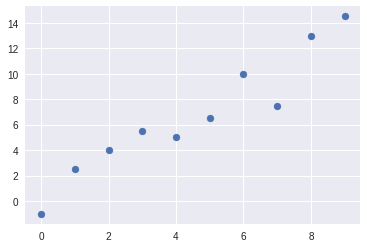

In [0]:
'''
Plotting the dataset
'''

import matplotlib.pyplot as plt

# This is a "magic function" specific to python notebooks which allow us to use
# matplotlib. Matplotlib is based on Tkinter, which usually opens up new windows.
# But this can't happen in python notebooks, so we need to tell it to do something different.
%matplotlib inline

# A small quirk of matplotlib; it can't plot [1, 2, 3]; the data must be [[1], [2], [3]]
x_plot = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
plt.scatter(x_plot, y)

## The Model

In [0]:
'''
Let's define some model! We'll have the equation y = wx + b, and w and b will start at 0.
'''

w = 0
b = 0

In [0]:
'''
Try creating a function which inputs a list and uses your model to output predictions.
Call this function "predict"
'''

def predict(data, w_, b_):
  l = []
  for i in range (len(data)):
    l = l + [(((data[i])*w_)+b_)]
    print(l)
  return l

In [0]:
predict([1,2,3], 2, 1)

[3]
[3, 5]
[3, 5, 7]


[3, 5, 7]

In [0]:
'''
Also try creating a function for calculating loss. Given two lists, try finding 
the loss between them.

You can either use the mean squared error or mean absolute error, your choice.
'''
import math
def loss(answers, guesses):
  n = 0
  for i in range(len(answers)):
    n = n + (answers[i] - guesses[i])**2
  return n

In [0]:
loss([1,2,3], [2,3,5])

6

## Gradient Descent Version 1

In [0]:
'''
Try doing naive gradient descent. Basically, at each step, see if w + 0.01 or w - 0.01 minimizes loss.
Also, try seeing if b + 0.01 or b - 0.01 minimizes loss.
'''
def trainb(x1, w1, b1, lr1, y1):
  h1 = predict(x1, w1, (b1+lr1))
  l1 = predict(x1, w1, (b1-lr1))
  hloss = loss(h1, y1)
  lloss = loss(l1, y1)
  if hloss > lloss:
    return b1 - lr1
  else:
    return b1 + lr1
    
def trainw(x2, w2, b2, lr2, y2):
  h2 = predict(x2, (w2+lr2), b2)
  l2 = predict(x2, (w2-lr2), (b2))
  hloss = loss(h2, y2)
  lloss = loss(l2, y2)
  if hloss > lloss:
    return w2 - lr2
  else:
    return w2 + lr2
# In this case, learning rate (lr) = 0.01. Feel free to modify this!
lr = 0.01
training_steps = 1000

for i in range(training_steps):
  j = predict(x, w, b)
  mloss = loss(y, j)
  b = trainb(x, w, b, lr, y)
  w = trainw(x, w, b, lr, y)
  # Case 1.1: (w + 0.01), b. Calculate the predictions and the corresponding loss.
  # Case 1.2: (w - 0.01), b. Calculate the predictions and the corresponding loss.
  
  # Case 2.1: w, (b + 0.01). Calculate the predictions and the corresponding loss.
  # Case 2.2: w, (b - 0.01). Calculate the predictions and the corresponding loss. 
  
  # Finally, update w and b.

In [0]:
#Find the bug!

'''
Try doing naive gradient descent. Basically, at each step, see if w + 0.01 or w - 0.01 minimizes loss.
Also, try seeing if b + 0.01 or b - 0.01 minimizes loss.
'''
def trainb(x1, w1, b1, lr1, y1):
  h1 = predict(x1, w1, (b1+lr1))
  l1 = predict(x1, w1, (b1+lr1))
  hloss = loss(h1, y1)
  lloss = loss(l1, y1)
  if hloss > lloss:
    return b1 - lr1
  else:
    return b1 + lr1
    
def trainw(x2, w2, b2, lr2, y2):
  h2 = predict(x2, (w2+lr2), b2)
  l2 = predict(x2, (w2+lr2), (b2))
  hloss = loss(h2, y2)
  lloss = loss(l2, y2)
  if hloss > lloss:
    return w2 - lr2
  else:
    return w2 + lr2
# In this case, learning rate (lr) = 0.01. Feel free to modify this!
lr = 0.01
training_steps = 1000

for i in range(training_steps):
  j = predict(x, w, b)
  mloss = loss(y, j)
  b = trainb(x, w, b, lr, y)
  w = trainw(x, w, b, lr, y)
  # Case 1.1: (w + 0.01), b. Calculate the predictions and the corresponding loss.
  # Case 1.2: (w - 0.01), b. Calculate the predictions and the corresponding loss.
  
  # Case 2.1: w, (b + 0.01). Calculate the predictions and the corresponding loss.
  # Case 2.2: w, (b - 0.01). Calculate the predictions and the corresponding loss. 
  
  # Finally, update w and b.

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 0


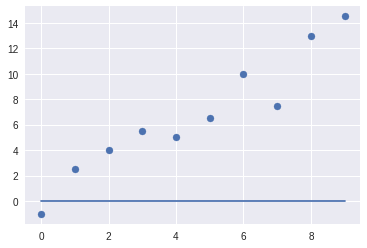

In [0]:
'''
Let's try to see how well our model is doing.
'''

y_pred = predict(x, w, b)
print(str(w) + " " + str(b))
plt.scatter(x_plot, y)
plt.plot(x_plot, y_pred)

## Gradient Descent Version 2
This previous approach is good enough for us right now. However, in the future, we'll be trying to update many, many weights in a very complex model. So let's see how to update the weights, given the derivative of the loss with respect to a weight.

Consider our loss function:

$$loss(w, b) = \frac{1}{m}\sum\limits_{i = 0}^{m-1}(y_i - y_{i pred})^2 = \frac{1}{m}\sum\limits_{i = 0}^{m-1}(y_i - wx_i - b)^2$$

Let's try to take the derivative of loss($w$, $b$) with respect to $w$. Want to find:

$$\frac{dloss(w,b)}{dw}$$

Note that $y_i$ and $x_i$ are constants. For our purposes, when taking the derivative with respect to $w$, the variable $b$ can be treated as a constant as well.

Now let's consider one term in the summation:

$$\frac{d(y_i - wx_i - b)^2}{dw}$$

Try computing this derivative! You'll need the chain rule.

Also try to compute 

$$\frac{dloss(w,b)}{db}$$

In [0]:
'''
We define two derivative functions.
'''

# The derivative of our loss function with respect to w
def derivative_w(y3, x3, w3, b3): 
  a = 0
  dloss = 0
  for i in range (len(y3)):
    dloss = dloss + (-2*x3[i]*(y3[i] - w3*x3[i] -b3))
    a += 1
  dloss = dloss/a
  return dloss
  
def derivative_b(outputs, inputs, w, b):
  a = 0
  dloss = 0
  for i in range (len(outputs)):
    dloss = dloss + (-2*(outputs[i] - w*inputs[i] -b))
    a += 1
  dloss = dloss/a
  return dloss

In [0]:
# Finally, let's try updating with our derivatives.

learning_rate = 0.01
steps = 10000

# Reset the w and b
w = 0
b = 0

# Given your derivatives work, this should work as well.
for i in range(steps):
  # First, we calculate the corresponding derivatives
  der_w = derivative_w(y, x, w, b)
  der_b = derivative_b(y, x, w, b)
  
  # Second, we update. If the slope (der_w) is positive, then we go backwards
  # if the slope is negative, we go forwards. Also, we multiply by learning rate
  # to control how fast/slow we're going.
  w += -learning_rate * der_w
  
  b += -learning_rate * der_b
  
  # If you're having trouble visualizing this, ask Oliver or Joshua, and we'll
  # go over the 3D geometry behind this.

[0.054545454545457055]
[0.054545454545457055, 1.5424242424242445]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819, 6.006060606060607]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819, 6.006060606060607, 7.493939393939394]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819, 6.006060606060607, 7.493939393939394, 8.98181818181818]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819, 6.006060606060607, 7.493939393939394, 8.98181818181818, 10.469696969696967]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819, 6.006060606060607, 7.493939393939394, 8.98181818181818, 10.469696969696967, 11.957575757575755]
[0.054545454545457055, 1.5424242424242445, 3.0303030303030316, 4.518181818181819, 6.0060606060

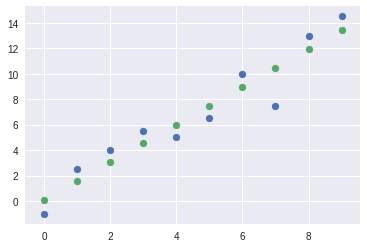

In [0]:
'''
Let's try to see how well our model is doing.
'''

y_pred = predict(x, w, b)

plt.scatter(x_plot, y)
plt.scatter(x_plot, y_pred)
